# Data exploration for Prophet forecasting

This notebook will help  explore raw telephony data and prepare it for time series forecasting with Prophet.

In [1]:
import pandas as pd
import numpy as np 

## load the data as CSV

Let's load  telephony dashboard data into a DataFrame. Update the path below if your file is in a different location.     

In [6]:
# import the data into the data frame

csv_path = '../data/2024-25 PMP Telephony Dashboard(2024-25 Raw Data).csv'
try: 
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    # try downloads as fallback
    csv_path = '/Users/clexp/Downloads/2024-25 PMP Telephony Dashboard(2024-25 Raw Data).csv'
    df = pd.read_csv(csv_path)

# Display the first few rows to verify the data loaded correctly
print("DataFrame shape:", df.shape)
df.head()


DataFrame shape: (10878, 39)


,Month,Day,Time,Date,Total Calls,Connected Calls,Calls Not Connected,Calls Not Connected (Length Limit Reached),Calls Not Connected (Contact Hung Up),Calls Not Connected (Caller Hangup Within 5 Seconds),...,Callback Avg Wait Time (s),Callback Avg Answer Time (s),Callback Avg Wrap Up Time (s),Callback Max Queue Length,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Apr-24,Tue,08:00,02/04/2024,317.0,97.0,220.0,218.0,2.0,0.0,...,524.0,524.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Apr-24,Tue,08:30,02/04/2024,185.0,58.0,127.0,124.0,3.0,0.0,...,620.0,620.0,19.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Apr-24,Tue,09:00,02/04/2024,93.0,39.0,54.0,39.0,15.0,2.0,...,885.0,885.0,19.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-24,Tue,09:30,02/04/2024,70.0,33.0,37.0,21.0,16.0,5.0,...,974.0,951.0,18.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Apr-24,Tue,10:00,02/04/2024,71.0,34.0,37.0,31.0,6.0,1.0,...,938.0,938.0,19.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# explore the data

# Get numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate statistics for numeric columns
stats_df = pd.DataFrame({
    'min': df[numeric_cols].min(),
    'max': df[numeric_cols].max(),
    'mean': df[numeric_cols].mean(),
    'median': df[numeric_cols].median(),
    'std': df[numeric_cols].std()
})

# Display the statistics
print("Statistical Summary of Numeric Columns:")
print("\n")
stats_df.round(2)  # Round to 2 decimal places for readability

# Also show the data types and non-null counts
#print("\nDataFrame Info:")
#print("\n")
#df.info()

Statistical Summary of Numeric Columns:




,min,max,mean,median,std
Total Calls,0.0,365.00,44.14,26.00,56.66
Connected Calls,0.0,107.00,19.65,18.00,13.98
Calls Not Connected,0.0,305.00,24.49,5.00,47.50
Calls Not Connected (Length Limit Reached),0.0,305.00,20.89,0.00,47.60
Calls Not Connected (Contact Hung Up),0.0,759.60,4.45,3.00,14.27
Calls Not Connected (Caller Hangup Within 5 Seconds),0.0,773.00,2.20,0.00,26.40
Calls Not Connected (Caller Hangup Within 10 Seconds),0.0,878.00,3.06,1.00,32.67
Calls Not Connected (Caller Hangup Within 20 Seconds),0.0,568.99,2.60,1.00,16.30
Availability (%),0.0,611.00,61.84,71.00,35.92
TOTAL CALLS INCLUDING HANGUPS (M),0.0,1729.00,365.93,286.00,306.04


In [8]:
# gather all the days into their own data frames and analyze call volume patterns

# Create a dictionary to store DataFrames for each day
day_dfs = {}

# Get unique days from the dataset
unique_days = df['Day'].unique()

# Create a DataFrame for each day and calculate statistics
for day in unique_days:
    # Filter data for the current day
    day_df = df[df['Day'] == day]
    
    # Calculate statistics for Total Calls
    stats = {
        'min': day_df['Total Calls'].min(),
        'max': day_df['Total Calls'].max(),
        'mean': day_df['Total Calls'].mean(),
        'median': day_df['Total Calls'].median(),
        'std': day_df['Total Calls'].std(),
        'count': len(day_df)
    }
    
    # Store the DataFrame and its statistics
    day_dfs[day] = {
        'data': day_df,
        'stats': stats
    }

# Print statistics for each day
print("Call Volume Statistics by Day:")
print("\n")
for day, data in day_dfs.items():
    print(f"\n{day}:")
    print(f"Number of time slots: {data['stats']['count']}")
    print(f"Minimum calls: {data['stats']['min']:.2f}")
    print(f"Maximum calls: {data['stats']['max']:.2f}")
    print(f"Mean calls: {data['stats']['mean']:.2f}")
    print(f"Median calls: {data['stats']['median']:.2f}")
    print(f"Standard deviation: {data['stats']['std']:.2f}")

# Create a summary DataFrame for easier comparison
summary_data = {
    'Day': [],
    'Min Calls': [],
    'Max Calls': [],
    'Mean Calls': [],
    'Median Calls': [],
    'Std Dev': [],
    'Time Slots': []
}

for day, data in day_dfs.items():
    summary_data['Day'].append(day)
    summary_data['Min Calls'].append(data['stats']['min'])
    summary_data['Max Calls'].append(data['stats']['max'])
    summary_data['Mean Calls'].append(data['stats']['mean'])
    summary_data['Median Calls'].append(data['stats']['median'])
    summary_data['Std Dev'].append(data['stats']['std'])
    summary_data['Time Slots'].append(data['stats']['count'])

summary_df = pd.DataFrame(summary_data)
print("\nSummary Table:")
print(summary_df.round(2))

Call Volume Statistics by Day:



Tue:
Number of time slots: 2205
Minimum calls: 0.00
Maximum calls: 365.00
Mean calls: 46.24
Median calls: 29.00
Standard deviation: 57.69

Wed:
Number of time slots: 2184
Minimum calls: 0.00
Maximum calls: 347.00
Mean calls: 34.11
Median calls: 23.00
Standard deviation: 48.85

Thu:
Number of time slots: 2184
Minimum calls: 0.00
Maximum calls: 363.00
Mean calls: 39.65
Median calls: 24.00
Standard deviation: 57.14

Fri:
Number of time slots: 2184
Minimum calls: 0.00
Maximum calls: 348.00
Mean calls: 35.18
Median calls: 22.00
Standard deviation: 47.86

Mon:
Number of time slots: 2121
Minimum calls: 0.00
Maximum calls: 356.00
Mean calls: 66.79
Median calls: 47.00
Standard deviation: 64.46

Summary Table:
   Day  Min Calls  Max Calls  Mean Calls  Median Calls  Std Dev  Time Slots
0  Tue        0.0      365.0       46.24          29.0    57.69        2205
1  Wed        0.0      347.0       34.11          23.0    48.85        2184
2  Thu        0.0      363.0

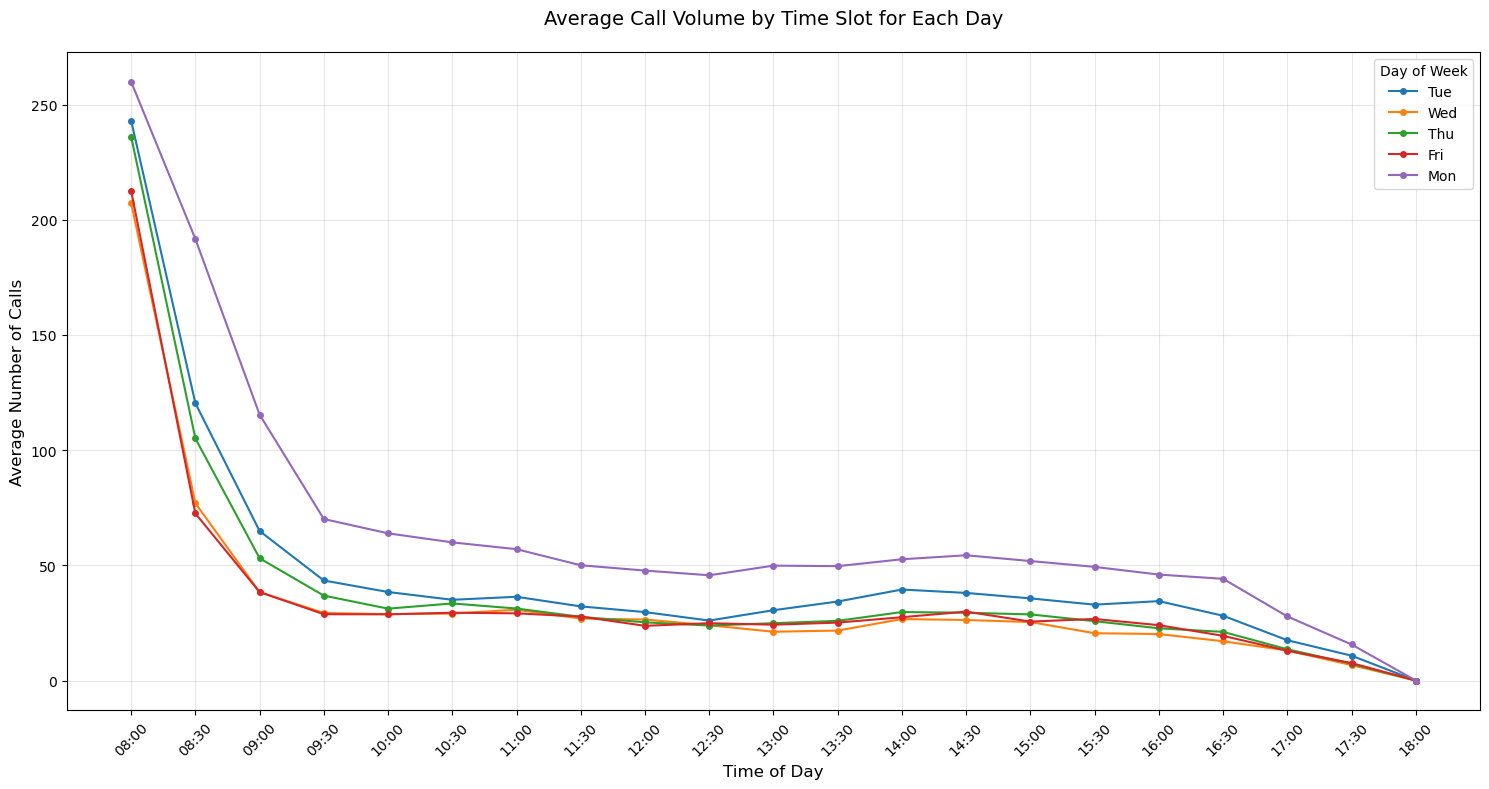


Time Slot Analysis by Day:

Tue:
     Time  Mean Calls  Std Dev  Count
0   08:00      243.04    67.86     53
1   08:30      120.38    83.54     53
2   09:00       64.89    47.13     53
3   09:30       43.42    23.63     53
4   10:00       38.42    17.58     53
5   10:30       35.04    15.66     53
6   11:00       36.34    15.69     53
7   11:30       32.17    15.51     53
8   12:00       29.70    12.42     53
9   12:30       26.02    10.20     53
10  13:00       30.51    15.92     53
11  13:30       34.28    19.57     53
12  14:00       39.49    22.32     53
13  14:30       38.02    22.99     53
14  15:00       35.64    16.95     53
15  15:30       32.92    19.07     53
16  16:00       34.45    21.80     53
17  16:30       28.11    19.97     53
18  17:00       17.49     8.92     53
19  17:30       10.77     5.94     53
20  18:00        0.00     0.00     53

Wed:
     Time  Mean Calls  Std Dev  Count
0   08:00      207.25    78.77     53
1   08:30       76.94    61.09     53
2   09:00 

In [9]:
# Create time slot analysis and visualization for each day

# First, let's create a function to process the time slot data for each day
def create_time_slot_analysis(day_df):
    # Group by time slot and calculate statistics
    time_slot_stats = day_df.groupby('Time').agg({
        'Total Calls': ['mean', 'std', 'count']
    }).reset_index()
    
    # Flatten the multi-level columns
    time_slot_stats.columns = ['Time', 'Mean Calls', 'Std Dev', 'Count']
    
    # Sort by time
    time_slot_stats = time_slot_stats.sort_values('Time')
    
    return time_slot_stats

# Create a dictionary to store time slot analysis for each day
time_slot_analysis = {}

# Process each day's data
for day, data in day_dfs.items():
    time_slot_analysis[day] = create_time_slot_analysis(data['data'])

# Create a combined DataFrame for plotting
plot_data = pd.DataFrame()

# Combine all days' data for plotting
for day, stats in time_slot_analysis.items():
    temp_df = stats[['Time', 'Mean Calls']].copy()
    temp_df['Day'] = day
    plot_data = pd.concat([plot_data, temp_df])

# Create the visualization
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(15, 8))

# Define colors for each day
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the plot
for i, day in enumerate(unique_days):
    day_data = plot_data[plot_data['Day'] == day]
    plt.plot(day_data['Time'], day_data['Mean Calls'], 
             label=day, marker='o', markersize=4, color=colors[i])

# Customize the plot
plt.title('Average Call Volume by Time Slot for Each Day', fontsize=14, pad=20)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Number of Calls', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Day of Week')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the time slot analysis for each day
print("\nTime Slot Analysis by Day:")
for day, stats in time_slot_analysis.items():
    print(f"\n{day}:")
    print(stats.round(2))

# Now build a prophet call volume model

import the library

In [11]:

from prophet import Prophet

## Setting up the Prophet Model

Prophet is a powerful time series forecasting tool that can handle:
- Daily seasonality (which we observed in our data exploration)
- Weekly patterns (different call volumes by day of week)
- Trend changes
- Holiday effects

We'll configure the model with parameters that make sense for our call center data:
- `daily_seasonality=True`: Enable daily patterns (we saw clear time-of-day patterns)
- `weekly_seasonality=True`: Enable weekly patterns (we observed different patterns by day)
- `yearly_seasonality=False`: We don't have enough data for yearly patterns
- `changepoint_prior_scale=0.05`: Moderate flexibility in trend changes
- `seasonality_prior_scale=10`: Strong seasonality (we saw clear patterns in our exploration)

In [22]:
# First, let's rename our columns to Prophet's required format
prophet_df = prophet_df.rename(columns={'datetime': 'ds', 'Total Calls': 'y'})

# Initialize the Prophet model with our previously discussed parameters
model = Prophet(
    daily_seasonality=True,      # Enable daily patterns
    weekly_seasonality=True,     # Enable weekly patterns
    yearly_seasonality=False,    # Disable yearly patterns (insufficient data)
    changepoint_prior_scale=0.05,  # Moderate flexibility in trend changes
    seasonality_prior_scale=10,    # Strong seasonality
    interval_width=0.95           # 95% prediction intervals
)


## Understanding Custom Seasonality and Fourier Order

### Custom Seasonality for Business Hours
The `add_seasonality()` method allows us to add custom seasonal patterns to our Prophet model. In our case, we're adding a business hours component because call centers typically have distinct patterns during operating hours versus non-operating hours.

### Fourier Order Explained
The `fourier_order` parameter (set to 3 in our model) is a crucial component that determines how complex our seasonal pattern can be:

- **What is Fourier Order?**
  - It represents the number of Fourier terms used to model the seasonal pattern
  - Higher orders allow for more complex patterns
  - Lower orders create smoother, simpler patterns

- **Why Order 3?**
  - Order 1: Basic sine wave (too simple for call patterns)
  - Order 2: Can capture basic peaks and troughs
  - Order 3: Can model more complex patterns like:
    - Morning rush
    - Lunchtime dip
    - Afternoon peak
    - End-of-day patterns

- **Trade-offs:**
  - Higher orders (4+) might overfit to noise in the data
  - Lower orders (1-2) might miss important patterns
  - Order 3 provides a good balance for call center data

### The `period` Parameter
- Set to 1 in our model
- Represents the length of the seasonal pattern in days
- For business hours, we use 1 because the pattern repeats daily

### The `condition_name` Parameter
- Set to 'is_business_hours'
- This will be used to create a binary feature indicating whether a time point falls within business hours
- Helps the model distinguish between operating and non-operating hours

This custom seasonality component will help our model better capture the distinct patterns we observed in our data exploration, particularly the variations in call volume during different times of the business day.

In [16]:

# Create a datetime column by combining Date and Time with the correct format
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M')

# Create the Prophet DataFrame
# We'll aggregate by hour to get call volumes
prophet_df = df.groupby(pd.Grouper(key='datetime', freq='H'))['Total Calls'].sum().reset_index()


# Display the first few rows to verify
print("DataFrame shape:", prophet_df.shape)
print("\nFirst few rows:")
print(prophet_df.head())

# Display basic statistics
print("\nBasic statistics:")
print(prophet_df.describe())

# Check for any missing values
print("\nMissing values:")
print(prophet_df.isnull().sum())

DataFrame shape: (17483, 2)

First few rows:
             datetime  Total Calls
0 2024-04-02 08:00:00        502.0
1 2024-04-02 09:00:00        163.0
2 2024-04-02 10:00:00        144.0
3 2024-04-02 11:00:00         94.0
4 2024-04-02 12:00:00         77.0

Basic statistics:
                  datetime   Total Calls
count                17483  17483.000000
mean   2025-04-01 13:00:00     13.891037
min    2024-04-02 08:00:00      0.000000
25%    2024-10-01 10:30:00      0.000000
50%    2025-04-01 13:00:00      0.000000
75%    2025-09-30 15:30:00      0.000000
max    2026-03-31 18:00:00    690.000000
std                    NaN     52.349206

Missing values:
datetime       0
Total Calls    0
dtype: int64


/var/folders/l2/q0k20lzj1wvck3m41jjm0k140000gn/T/ipykernel_6490/1489040211.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  prophet_df = df.groupby(pd.Grouper(key='datetime', freq='H'))['Total Calls'].sum().reset_index()


## Prophet Model Training and Visualization

### Model Training Process
1. **Data Preparation**
   - We've already prepared our data with:
     - `ds`: datetime column (hourly timestamps)
     - `y`: Total Calls column (call volumes)

2. **Model Configuration**
   - Daily seasonality enabled (captures hourly patterns)
   - Weekly seasonality enabled (captures day-of-week patterns)
   - Custom business hours seasonality (Fourier order 3)
   - Moderate trend flexibility (changepoint_prior_scale=0.05)
   - Strong seasonality (seasonality_prior_scale=10)

3. **Training and Prediction**
   - Model is fitted to historical data
   - Future dataframe created for 7 days of hourly predictions
   - Predictions include:
     - Point forecasts
     - Confidence intervals (95%)

4. **Visualization Components**
   - Main forecast plot:
     - Historical data (black dots)
     - Forecast line (blue)
     - Confidence intervals (light blue)
   - Component plots:
     - Trend
     - Weekly seasonality
     - Daily seasonality
     - Custom business hours seasonality

### What to Look For
- How well the forecast follows historical patterns
- Width of confidence intervals
- Strength of different seasonal components
- Any unusual patterns or anomalies

19:32:01 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarra

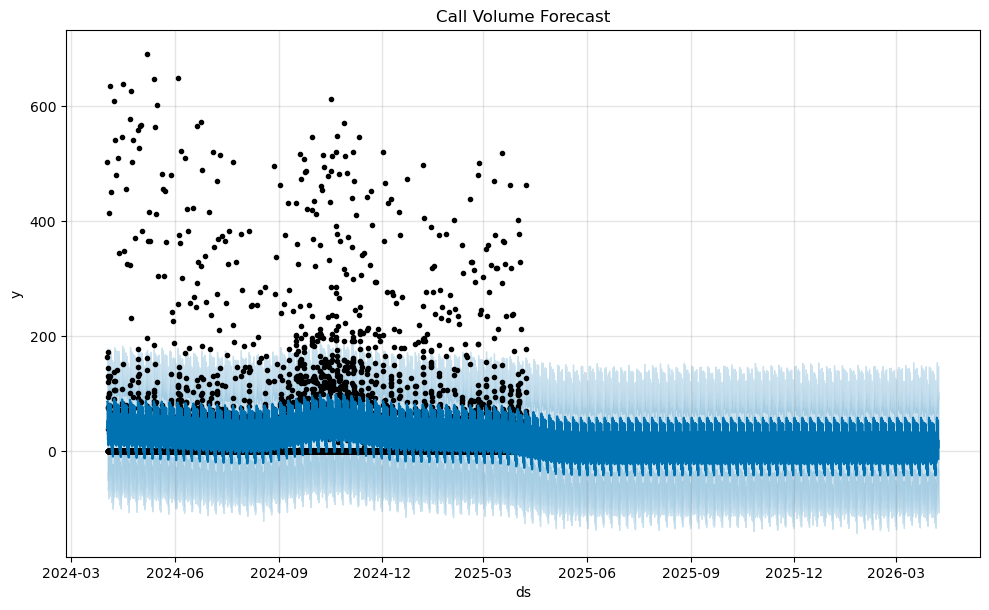

/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

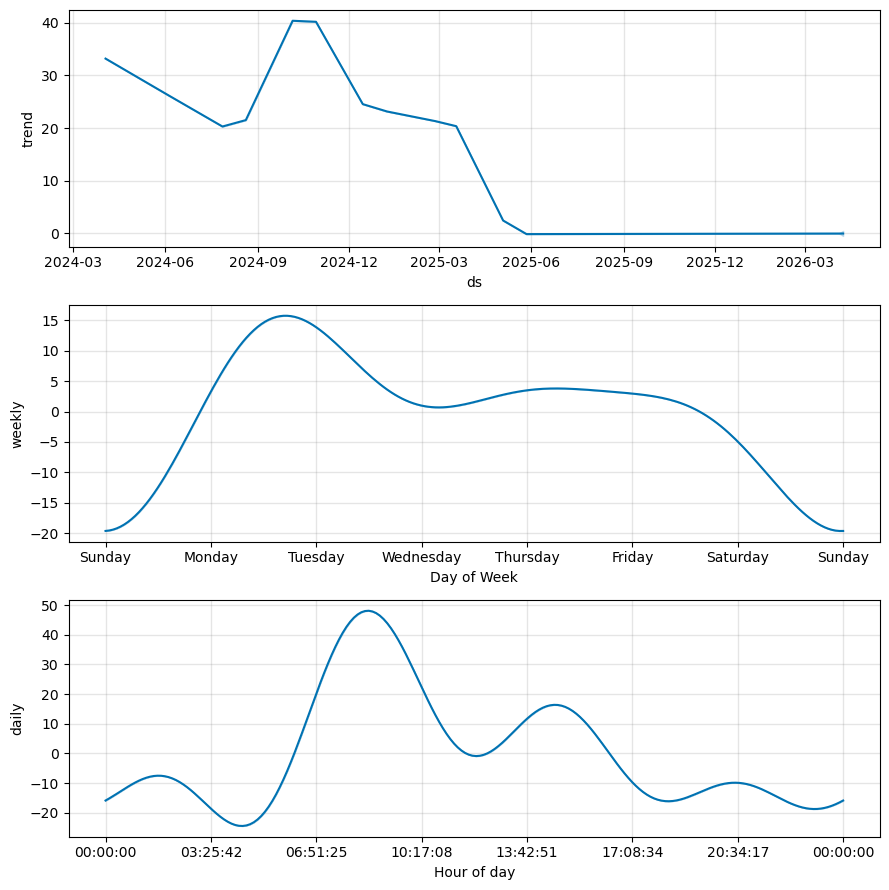

In [23]:
import matplotlib.pyplot as plt
# Fit the model
model.fit(prophet_df)

# Create future dataframe for predictions
# Let's predict for the next 7 days
future = model.make_future_dataframe(periods=7*24, freq='H')  # 7 days * 24 hours

# Make predictions
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)
plt.title('Call Volume Forecast')
plt.show()

# Plot the components (trend, weekly, daily seasonality)
fig2 = model.plot_components(forecast)
plt.show()

## Issues with Current Prophet Implementation
The main graph has too much data on it and I cannot tellwhat is what.  

 We are mapping working hours a trend over time, I do not want the mean for the whole period, or for the whole day.  Looking at the trend graph I do not need a giant pile of empty data in the future.  I think my dataset includes this.  The weekly trend does not need saturday and sunday, and the week trend appears smooth, where infact it is point for each 30 min slot of each day.  The daily trend is obviously a  modified sine wave and does not look like the actual day trend at all.  Is it supposed to be this way?


### 1. Data Granularity
- **Current Issue:** We're aggregating to hourly data, losing the 30-minute granularity
- **Solution:** Drop back to 1/2 granularity


### 2. Working Hours Focus
- **Current Issue:** Model is trying to fit all hours, including non-working hours
- **Solution:** Consider another 'seasonality'


### 3. Future Predictions
- **Current Issue:** Model is predicting for all hours, including non-working hours
- **Solution:** ???


### 4. Weekly Seasonality
- **Current Issue:** Model includes weekends and smooths the data too much
- **Solution:** ????

### 5. Daily Pattern
- **Current Issue:** The sine wave doesn't match actual call patterns
- **Solution:** We can increase the Fourier order for daily seasonality
```python
# Modify the model initialization
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10,
    interval_width=0.95,
    daily_seasonality_fourier_order=10  # Increased to capture more complex patterns
)
```

Would you like me to provide a complete revised version of the code that addresses all these issues? We can:
1. Maintain 30-minute granularity
2. Focus on working hours
3. Remove weekend data
4. Increase the complexity of the daily pattern
5. Create more detailed visualizations

Let me know which aspects you'd like to tackle first!
